In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def linear(x,m,b):
    return m*x + b

In [4]:
xy = [37.300249633659405, 73.99403802458255,
559.0307340928548, 428.8505366216996,
1072.0346591139469, 912.3128159246753,
1532.843333159576, 1426.9347289922898,
2044.8529709880531, 1898.3881616566705,
2551.505041904862, 2403.6517160927506,
3068.872246645007, 2858.2506218127855,
3524.3233537789692, 3354.0862771370066,
4060.9391863062538, 3798.0533861242475,
4554.6558704453455, 4249.146622211636,
5040.485829959514, 4693.557989997618,
5526.315789473685, 5137.969357783599,
6052.631578947368, 5547.928078113835,
6551.050786424628, 5937.305223908819,
7031.826843437415, 6350.793374174629,
7552.229037433468, 6762.18780697647,
8056.892533965047, 7163.752844923867,
8561.128068695274, 7548.521570950968,
9028.340080971659, 7939.678097959832,
9554.655870445345, 8281.009367309676,
10060.728744939272, 8605.253234897198,
10546.55870445344, 8826.625386996904,
11035.029799655957, 9018.68681293534,
11549.61370231305, 9323.465956976568,
12065.356524358107, 9697.061810365867,
12526.649617230149, 10089.394173498735,
13056.68016194332, 10259.188695721205,
13542.51012145749, 10600.658887036596,
14048.58299595142, 10976.373342859411,
14514.170040485831, 11249.285544177186,
15020.242914979757, 11556.372549019608,
15526.315789473687, 11932.087004842424,
16012.145748987856, 12239.243470667621,
16512.345571753747, 12478.02753352156,
17044.534412955465, 12956.28919584028,
17550.60728744939, 13023.180122251331,
18031.311358621053, 13811.54404198243,
18542.51012145749, 13946.247122330715,
19028.34008097166, 14150.462411685323,
19554.655870445345, 14577.577994760659,
20020.24291497975, 15039.21568627451,
20526.26366179565, 15034.263962864197,
]

In [5]:
x = []
y = []
for i, val in enumerate(xy):
    if i%2==0:
        x.append(val)
    if i%2==1:
        y.append(val)
x = np.array(x)
y = np.array(y)

slope, intercept  [6.57079242e-01 1.74468004e+03]


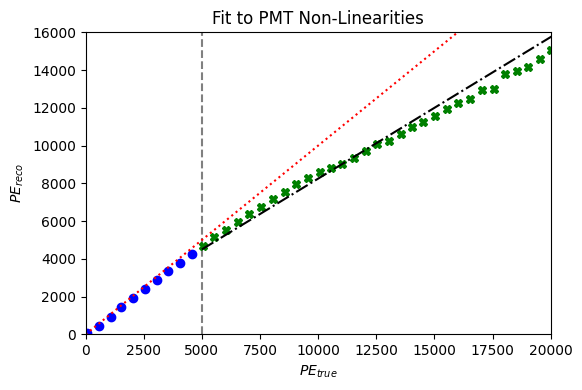

In [6]:
lin = np.where(x < 5000)
nonlin = np.where((x >= 5000))
plt.figure(dpi=100)
plt.plot(x[lin],y[lin],      "o", color="blue")
plt.plot(x[nonlin],y[nonlin],"X", color="green")

popt, pcov = curve_fit(linear,x[nonlin],y[nonlin])

plt.plot(np.linspace(5000,3e5),linear(np.linspace(5000,3e5),0.75,0.75e3),color="black",linestyle="-.")
# plt.plot(np.linspace(5000,3e5),linear(np.linspace(5000,3e5),*popt),color="black",linestyle="-.")

print("slope, intercept ", popt)

ymin = 0
ymax = 16e3

plt.vlines(5e3,ymin=ymin,ymax=ymax,color="gray",linestyle="--")

plt.plot([0,1e5],[0,1e5],'r',linestyle="dotted")
plt.xlim(0,2e4)
plt.ylim(ymin,ymax)
plt.xlabel("$PE_{true}$")
plt.ylabel("$PE_{reco}$")

plt.title("Fit to PMT Non-Linearities")
plt.show()

(-0.1, 0.1)

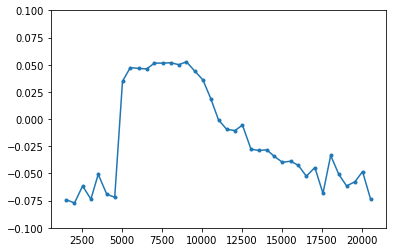

In [7]:
def piecewise(x):
    return np.where(x < 5000, x, linear(x,0.75,0.75e3))

plt.plot(x[3:],(y[3:]-piecewise(x[3:]))/y[3:],".-")
plt.ylim(-0.1,0.1)
